## Homework 3: Machine learning

In this assignment, we'll practice the classification skills from machine learning. We'll use the precinct-level voting data to predict support for Prop 21 (rent control) on the 2020 ballot. For example, we might expect the share of renters to be an important predictor.

We'll also review joins as we prepare the data.

Start by loading the 2020 elections results from LA County into a `pandas` dataframe, `voteDf` (This is exactly the same data as we used in the clustering lectures; I put another copy of the data file in the assignment GitHub folder to make things easier.)

In [206]:
import pandas as pd

voteDf = pd.read_csv('c037_g20_sov_data_by_g20_srprec.csv')


print(len(voteDf))
print(voteDf.head())

4313
   county    srprec  addist  cddist  sddist  bedist  TOTREG  DEMREG  REPREG  \
0      19  0050005A      36      25      21       1    1974       0       0   
1      19  0050014A      36      25      21       1     697       0       0   
2      19  0050022A      36      27      25       1      61       0       0   
3      19  0050024A      41      27      25       1       0       0       0   
4      19  0050025A      36      25      25       1       5       0       0   

   AIPREG  ...  PR_23_Y  PR_24_N  PR_24_Y  PR_25_N  PR_25_Y  SENAIP01  \
0       0  ...      430      945      771     1304      398         0   
1       0  ...      100      314      223      427      116         0   
2       0  ...       10       27       22       35       15         0   
3       0  ...        0        0        0        0        0         0   
4       0  ...        1        2        3        1        3         0   

   SENDEM01  SENDEM02  SENLIB01  SENREP01  
0       524         0         0      

In [207]:
# Autograding tests - do not edit
assert len(voteDf) == 4313
assert isinstance(voteDf, pd.DataFrame)

To do some prediction, we'll want to add variables from (say) the census or other sources.
For that, we need the lookup file that matches precincts to census blocks and tracts. [You can find it here](https://statewidedatabase.org/d10/g20_geo_conv.html), or just use the file `c037_g20_sr_blk_map.csv` in your GitHub repository. (Note that there are several types of precincts; the ones that we are using here are called `srprec`.) 

Each precinct intersects with many census blocks. The `pctsrprec` column tells you how much of the precinct lies within that block. For example, in the first few rows of `c037_g20_sr_blk_map.csv`, you'll see 49 different rows for precint `0050003A`, each matching to a different census block, with the `pctsrprec` column adding up to 100.

Our aim is to create a new dataframe with the vote counts (for all of the propositions and other races) aggregated to census tract. This is a multi-stage process, so let's do this step by step.

In this step, you should:
- load in the lookup data into a new dataframe, `lookupDf`
- join the voting dataframe to the lookup dataframe using `srprec`, to create a new dataframe called `joinDf`. This is a 1:many join, since there are many census blocks per precinct. Do an inner join, as the Null values are not going to be useful to us. (In other words, throw away any lookups that don't match a precinct.)
- make sure that `srprec` is the index

In [208]:
lookupDf = pd.read_csv('c037_g20_sr_blk_map.csv')

In [209]:
lookupDf.set_index('srprec')
voteDf.set_index('srprec')

joinDf = lookupDf.merge(voteDf, how='left', on='srprec')
joinDf = joinDf.dropna()
joinDf

,srprec,tract,block,blkreg,srtotreg,pctsrprec,blktotreg,pctblk,county,addist,...,PR_23_Y,PR_24_N,PR_24_Y,PR_25_N,PR_25_Y,SENAIP01,SENDEM01,SENDEM02,SENLIB01,SENREP01
1,0050005A,910804,1220,2,1998.0,0.100100,2,100.0,19.0,36.0,...,430.0,945.0,771.0,1304.0,398.0,0.0,524.0,0.0,0.0,1197.0
2,0050005A,910805,1000,8,1998.0,0.400400,8,100.0,19.0,36.0,...,430.0,945.0,771.0,1304.0,398.0,0.0,524.0,0.0,0.0,1197.0
3,0050005A,910805,1001,30,1998.0,1.501502,30,100.0,19.0,36.0,...,430.0,945.0,771.0,1304.0,398.0,0.0,524.0,0.0,0.0,1197.0
4,0050005A,910805,1002,38,1998.0,1.901902,38,100.0,19.0,36.0,...,430.0,945.0,771.0,1304.0,398.0,0.0,524.0,0.0,0.0,1197.0
5,0050005A,910805,1004,15,1998.0,0.750751,15,100.0,19.0,36.0,...,430.0,945.0,771.0,1304.0,398.0,0.0,524.0,0.0,0.0,1197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77699,9008296A,294830,2013,64,1615.0,3.962848,64,100.0,19.0,64.0,...,385.0,273.0,528.0,449.0,363.0,219.0,544.0,0.0,0.0,0.0
77700,9008296A,294830,2014,1,1615.0,0.061920,1,100.0,19.0,64.0,...,385.0,273.0,528.0,449.0,363.0,219.0,544.0,0.0,0.0,0.0
77701,9008296A,294830,2017,3,1615.0,0.185759,3,100.0,19.0,64.0,...,385.0,273.0,528.0,449.0,363.0,219.0,544.0,0.0,0.0,0.0
77702,9008296A,294830,2018,10,1615.0,0.619195,10,100.0,19.0,64.0,...,385.0,273.0,528.0,449.0,363.0,219.0,544.0,0.0,0.0,0.0


In [210]:
joinDf.index.name = 'srprec'

In [211]:
print(len(lookupDf))
print(len(joinDf))
assert joinDf.index.name=='srprec'
assert len(lookupDf)==77704
assert len(joinDf)==77703
assert joinDf.county.count()==77703
assert joinDf.TOTREG.sum()==168427815

77704
77703


Now let's calculate vote shares on Prop 21 and in the presidential race for each census tract. 

This is slightly tricky, because your data frame `joinDf` will have multiple rows per tract (because the precinct geography does not match the census geography). For example, the following code shows you which precincts intersect with tract 119342. 

13.65% of the first precinct listed, `9004204A`, is in tract 119342.

In [212]:
joinDf[joinDf.tract==119342][['tract','pctsrprec']].sort_index(ascending=False)

,tract,pctsrprec
srprec,,
72948,119342,13.653137
58410,119342,0.533463
58409,119342,25.412221
58408,119342,22.065955


So to aggregate to tracts, you should:
- for each relevant column, multiply the number of votes by `pctsrprec`, and divide by 100 (because `pctsrprec` is a percentage, not a fraction)
- group by census tract and sum those relevant columns, to create a new dataframe called `tractVotes`. It should have columns `PR_21_N`, `PR_21_Y`, `PRSDEM01`, `PRSREP01`, etc.

This will give us our estimate of votes at the tract level.

*Hint*: You can pass multiple columns to `groupby`. E.g. `df.groupby('groupcol')[['col1','col2','col3']].sum()`

In [213]:
joinDf.columns

Index(['srprec', 'tract', 'block', 'blkreg', 'srtotreg', 'pctsrprec',
       'blktotreg', 'pctblk', 'county', 'addist', 'cddist', 'sddist', 'bedist',
       'TOTREG', 'DEMREG', 'REPREG', 'AIPREG', 'GRNREG', 'LIBREG', 'NLPREG',
       'REFREG', 'DCLREG', 'MSCREG', 'TOTVOTE', 'DEMVOTE', 'REPVOTE',
       'AIPVOTE', 'GRNVOTE', 'LIBVOTE', 'NLPVOTE', 'REFVOTE', 'DCLVOTE',
       'MSCVOTE', 'PRCVOTE', 'ABSVOTE', 'ASSDEM01', 'ASSDEM02', 'ASSGRN01',
       'ASSIND01', 'ASSLIB01', 'ASSREP01', 'ASSREP02', 'CNGDEM01', 'CNGDEM02',
       'CNGREP01', 'PRSAIP01', 'PRSDEM01', 'PRSGRN01', 'PRSLIB01', 'PRSPAF01',
       'PRSREP01', 'PR_14_N', 'PR_14_Y', 'PR_15_N', 'PR_15_Y', 'PR_16_N',
       'PR_16_Y', 'PR_17_N', 'PR_17_Y', 'PR_18_N', 'PR_18_Y', 'PR_19_N',
       'PR_19_Y', 'PR_20_N', 'PR_20_Y', 'PR_21_N', 'PR_21_Y', 'PR_22_N',
       'PR_22_Y', 'PR_23_N', 'PR_23_Y', 'PR_24_N', 'PR_24_Y', 'PR_25_N',
       'PR_25_Y', 'SENAIP01', 'SENDEM01', 'SENDEM02', 'SENLIB01', 'SENREP01'],
      dtype='object')

In [214]:
props = [col for col in joinDf.columns if col.startswith('PR')]
print(props)

['PRCVOTE', 'PRSAIP01', 'PRSDEM01', 'PRSGRN01', 'PRSLIB01', 'PRSPAF01', 'PRSREP01', 'PR_14_N', 'PR_14_Y', 'PR_15_N', 'PR_15_Y', 'PR_16_N', 'PR_16_Y', 'PR_17_N', 'PR_17_Y', 'PR_18_N', 'PR_18_Y', 'PR_19_N', 'PR_19_Y', 'PR_20_N', 'PR_20_Y', 'PR_21_N', 'PR_21_Y', 'PR_22_N', 'PR_22_Y', 'PR_23_N', 'PR_23_Y', 'PR_24_N', 'PR_24_Y', 'PR_25_N', 'PR_25_Y']


In [215]:
for prop in props:
    joinDf[prop] = joinDf[prop] * joinDf['pctsrprec'] / 100
joinDf.head()

,srprec,tract,block,blkreg,srtotreg,pctsrprec,blktotreg,pctblk,county,addist,...,PR_23_Y,PR_24_N,PR_24_Y,PR_25_N,PR_25_Y,SENAIP01,SENDEM01,SENDEM02,SENLIB01,SENREP01
srprec,,,,,,,,,,,,,,,,,,,,,
1,0050005A,910804,1220,2,1998.0,0.100100,2,100.0,19.0,36.0,...,0.430430,0.945946,0.771772,1.305305,0.398398,0.0,524.0,0.0,0.0,1197.0
2,0050005A,910805,1000,8,1998.0,0.400400,8,100.0,19.0,36.0,...,1.721722,3.783784,3.087087,5.221221,1.593594,0.0,524.0,0.0,0.0,1197.0
3,0050005A,910805,1001,30,1998.0,1.501502,30,100.0,19.0,36.0,...,6.456456,14.189189,11.576577,19.579580,5.975976,0.0,524.0,0.0,0.0,1197.0
4,0050005A,910805,1002,38,1998.0,1.901902,38,100.0,19.0,36.0,...,8.178178,17.972973,14.663664,24.800801,7.569570,0.0,524.0,0.0,0.0,1197.0
5,0050005A,910805,1004,15,1998.0,0.750751,15,100.0,19.0,36.0,...,3.228228,7.094595,5.788288,9.789790,2.987988,0.0,524.0,0.0,0.0,1197.0


In [216]:
joinDf.columns

Index(['srprec', 'tract', 'block', 'blkreg', 'srtotreg', 'pctsrprec',
       'blktotreg', 'pctblk', 'county', 'addist', 'cddist', 'sddist', 'bedist',
       'TOTREG', 'DEMREG', 'REPREG', 'AIPREG', 'GRNREG', 'LIBREG', 'NLPREG',
       'REFREG', 'DCLREG', 'MSCREG', 'TOTVOTE', 'DEMVOTE', 'REPVOTE',
       'AIPVOTE', 'GRNVOTE', 'LIBVOTE', 'NLPVOTE', 'REFVOTE', 'DCLVOTE',
       'MSCVOTE', 'PRCVOTE', 'ABSVOTE', 'ASSDEM01', 'ASSDEM02', 'ASSGRN01',
       'ASSIND01', 'ASSLIB01', 'ASSREP01', 'ASSREP02', 'CNGDEM01', 'CNGDEM02',
       'CNGREP01', 'PRSAIP01', 'PRSDEM01', 'PRSGRN01', 'PRSLIB01', 'PRSPAF01',
       'PRSREP01', 'PR_14_N', 'PR_14_Y', 'PR_15_N', 'PR_15_Y', 'PR_16_N',
       'PR_16_Y', 'PR_17_N', 'PR_17_Y', 'PR_18_N', 'PR_18_Y', 'PR_19_N',
       'PR_19_Y', 'PR_20_N', 'PR_20_Y', 'PR_21_N', 'PR_21_Y', 'PR_22_N',
       'PR_22_Y', 'PR_23_N', 'PR_23_Y', 'PR_24_N', 'PR_24_Y', 'PR_25_N',
       'PR_25_Y', 'SENAIP01', 'SENDEM01', 'SENDEM02', 'SENLIB01', 'SENREP01'],
      dtype='object')

In [217]:
tractVotes = joinDf.groupby('tract')[['PRSAIP01', 'PRSDEM01', 'PRSGRN01', 'PRSLIB01', 'PRSPAF01',
       'PRSREP01', 'PR_14_N', 'PR_14_Y', 'PR_15_N', 'PR_15_Y', 'PR_16_N',
       'PR_16_Y', 'PR_17_N', 'PR_17_Y', 'PR_18_N', 'PR_18_Y', 'PR_19_N',
       'PR_19_Y', 'PR_20_N', 'PR_20_Y', 'PR_21_N', 'PR_21_Y', 'PR_22_N',
       'PR_22_Y', 'PR_23_N', 'PR_23_Y', 'PR_24_N', 'PR_24_Y', 'PR_25_N',
       'PR_25_Y']].sum()
tractVotes

,PRSAIP01,PRSDEM01,PRSGRN01,PRSLIB01,PRSPAF01,PRSREP01,PR_14_N,PR_14_Y,PR_15_N,PR_15_Y,...,PR_21_N,PR_21_Y,PR_22_N,PR_22_Y,PR_23_N,PR_23_Y,PR_24_N,PR_24_Y,PR_25_N,PR_25_Y
tract,,,,,,,,,,,,,,,,,,,,,
101110,7.766703,1090.712262,6.868405,19.856228,5.053018,895.321045,962.329158,892.061613,1077.848649,825.584199,...,1024.227956,857.734445,783.197202,1114.781552,1193.864946,684.259087,791.309914,1057.200590,1125.241918,707.394330
101122,6.449905,1057.143636,9.852175,21.009857,4.237346,896.821118,1045.047212,823.808556,1165.173592,748.253283,...,1138.460030,747.218978,759.480948,1144.625258,1236.906553,640.812911,867.142242,990.111777,1155.492180,689.751841
101210,15.399696,949.817716,7.915160,15.681777,6.831097,723.604530,719.015830,789.361391,771.748553,790.950727,...,714.308221,849.445489,629.974124,935.472449,926.220401,636.775965,586.730515,939.437343,893.891693,603.689537
101220,10.215807,747.489059,5.496622,13.538143,2.821920,604.907175,666.400552,599.610555,758.845546,547.155367,...,761.014272,528.747773,516.689493,783.948110,838.571899,445.499880,557.448756,710.292286,775.929673,474.425479
101300,15.420898,1159.946654,8.251537,21.535832,3.829465,948.800765,1051.259506,929.100502,1206.198171,836.581936,...,1218.104598,796.031104,809.118262,1223.881587,1322.571996,681.001474,881.741622,1099.264621,1217.864436,736.929851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980025,0.029538,2.144000,0.009846,0.017231,0.012308,0.435692,0.942769,1.499077,1.092923,1.435077,...,1.191385,1.331692,1.083077,1.464615,1.464615,1.090462,0.758154,1.720615,1.260308,1.203692
980026,0.016273,3.248169,0.019528,0.048820,0.009764,2.688365,3.183076,2.483320,3.528072,2.258747,...,3.443450,2.245728,2.226200,3.531326,3.739626,1.946298,2.584215,3.036615,3.433686,2.125305
980028,0.069725,23.790061,0.166291,0.303366,0.040509,6.556109,13.517974,15.958115,12.292145,17.696484,...,13.480156,15.983655,14.257563,15.695711,17.148954,12.017630,11.330424,17.727317,13.654153,15.405963


In [218]:
print(len(tractVotes))
print(tractVotes.PR_21_Y.sum())

# Autograding tests - do not edit
assert len(tractVotes)==2338
assert tractVotes.PR_21_Y.sum().round() == 2021487

2338
2021486.9997128805


Now let's get a dataframe of some relevant census variables, using `cenpy`. Check back to the Week 1 example and the first homework.

Create a dataframe, `censusDf`, with ACS 2019 tract-level data for LA County, and variables for Tenure (B25003_001E, B25003_002E, B25003_003E) and median household income (B19013_001E). Add a column with the percent of renters, called `pct_renter`.

You can also rename the median HH income column to something more meaningful.

*Hint:* Use the `from_county()` function in `cenpy`, which accepts a list of variables. You can see the definitions of these variables with 

```
acs = cenpy.products.ACS()
acs.filter_variables(variable_name)
```

In [219]:
import cenpy
from cenpy import products
censusDf = products.ACS(2019).from_county('Los Angeles, CA', level='tract',
                                        variables=['B25003_001E', 'B25003_002E', 'B25003_003E','B19013_001E'])
censusDf

/Users/micaobrien/opt/anaconda3/envs/uds/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/Users/micaobrien/opt/anaconda3/envs/uds/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/micaobrien/opt/anaconda3/envs/uds/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` pr

,GEOID,geometry,B19013_001E,B25003_001E,B25003_002E,B25003_003E,NAME,state,county,tract
0,06037670406,"POLYGON ((-13179479.200 3996769.190, -13179430...",186667.0,660.0,629.0,31.0,"Census Tract 6704.06, Los Angeles County, Cali...",06,037,670406
1,06037294810,"POLYGON ((-13166246.760 3999602.070, -13166101...",49952.0,1025.0,123.0,902.0,"Census Tract 2948.10, Los Angeles County, Cali...",06,037,294810
2,06037294830,"POLYGON ((-13166192.100 3998822.200, -13166047...",44527.0,1038.0,167.0,871.0,"Census Tract 2948.30, Los Angeles County, Cali...",06,037,294830
3,06037576501,"POLYGON ((-13155945.260 3997937.800, -13155922...",36742.0,1429.0,120.0,1309.0,"Census Tract 5765.01, Los Angeles County, Cali...",06,037,576501
4,06037576801,"POLYGON ((-13154364.520 3997746.170, -13154364...",49982.0,1926.0,416.0,1510.0,"Census Tract 5768.01, Los Angeles County, Cali...",06,037,576801
...,...,...,...,...,...,...,...,...,...,...
2341,06037402200,"POLYGON ((-13112043.630 4038591.700, -13112039...",85963.0,2011.0,1440.0,571.0,"Census Tract 4022, Los Angeles County, California",06,037,402200
2342,06037401703,"POLYGON ((-13108580.930 4042065.020, -13108567...",70642.0,1433.0,626.0,807.0,"Census Tract 4017.03, Los Angeles County, Cali...",06,037,401703
2343,06037402904,"POLYGON ((-13107705.290 4031912.680, -13107645...",71637.0,793.0,618.0,175.0,"Census Tract 4029.04, Los Angeles County, Cali...",06,037,402904
2344,06037402001,"POLYGON ((-13105905.920 4041429.180, -13105903...",83409.0,1124.0,495.0,629.0,"Census Tract 4020.01, Los Angeles County, Cali...",06,037,402001


In [220]:
censusDf = censusDf.rename(columns={"B19013_001E": "median_hh"})

In [221]:
#acs = cenpy.products.ACS()
#acs.filter_variables('B25003_003E')

In [222]:
censusDf['pct_renter'] = censusDf['B25003_003E'] / censusDf['B25003_001E'] * 100
censusDf

,GEOID,geometry,median_hh,B25003_001E,B25003_002E,B25003_003E,NAME,state,county,tract,pct_renter
0,06037670406,"POLYGON ((-13179479.200 3996769.190, -13179430...",186667.0,660.0,629.0,31.0,"Census Tract 6704.06, Los Angeles County, Cali...",06,037,670406,4.696970
1,06037294810,"POLYGON ((-13166246.760 3999602.070, -13166101...",49952.0,1025.0,123.0,902.0,"Census Tract 2948.10, Los Angeles County, Cali...",06,037,294810,88.000000
2,06037294830,"POLYGON ((-13166192.100 3998822.200, -13166047...",44527.0,1038.0,167.0,871.0,"Census Tract 2948.30, Los Angeles County, Cali...",06,037,294830,83.911368
3,06037576501,"POLYGON ((-13155945.260 3997937.800, -13155922...",36742.0,1429.0,120.0,1309.0,"Census Tract 5765.01, Los Angeles County, Cali...",06,037,576501,91.602519
4,06037576801,"POLYGON ((-13154364.520 3997746.170, -13154364...",49982.0,1926.0,416.0,1510.0,"Census Tract 5768.01, Los Angeles County, Cali...",06,037,576801,78.400831
...,...,...,...,...,...,...,...,...,...,...,...
2341,06037402200,"POLYGON ((-13112043.630 4038591.700, -13112039...",85963.0,2011.0,1440.0,571.0,"Census Tract 4022, Los Angeles County, California",06,037,402200,28.393834
2342,06037401703,"POLYGON ((-13108580.930 4042065.020, -13108567...",70642.0,1433.0,626.0,807.0,"Census Tract 4017.03, Los Angeles County, Cali...",06,037,401703,56.315422
2343,06037402904,"POLYGON ((-13107705.290 4031912.680, -13107645...",71637.0,793.0,618.0,175.0,"Census Tract 4029.04, Los Angeles County, Cali...",06,037,402904,22.068096
2344,06037402001,"POLYGON ((-13105905.920 4041429.180, -13105903...",83409.0,1124.0,495.0,629.0,"Census Tract 4020.01, Los Angeles County, Cali...",06,037,402001,55.960854


In [223]:
print (len(censusDf))
print (censusDf.pct_renter.mean().round())

# Autograding tests - do not edit
assert len(censusDf) == 2346
assert censusDf.pct_renter.mean().round() == 53

2346
53.0


Create a new dataframe, `joinedDf`, with both your voting and census data, through a left join to the voting data. 

*Hint*: It will be easiest to join on the `tract` column (which is your index in `tractVotes`). Since everything is in LA County, you don't need to worry about the `state` or `county` fields.

*Hint*: You'll need to convert the `tract` column in `censusDf` to an integer first.

In [224]:
censusDf['tract'] = censusDf.tract.astype(float)

In [225]:
censusDf.reset_index()
tractVotes.reset_index()

,tract,PRSAIP01,PRSDEM01,PRSGRN01,PRSLIB01,PRSPAF01,PRSREP01,PR_14_N,PR_14_Y,PR_15_N,...,PR_21_N,PR_21_Y,PR_22_N,PR_22_Y,PR_23_N,PR_23_Y,PR_24_N,PR_24_Y,PR_25_N,PR_25_Y
0,101110,7.766703,1090.712262,6.868405,19.856228,5.053018,895.321045,962.329158,892.061613,1077.848649,...,1024.227956,857.734445,783.197202,1114.781552,1193.864946,684.259087,791.309914,1057.200590,1125.241918,707.394330
1,101122,6.449905,1057.143636,9.852175,21.009857,4.237346,896.821118,1045.047212,823.808556,1165.173592,...,1138.460030,747.218978,759.480948,1144.625258,1236.906553,640.812911,867.142242,990.111777,1155.492180,689.751841
2,101210,15.399696,949.817716,7.915160,15.681777,6.831097,723.604530,719.015830,789.361391,771.748553,...,714.308221,849.445489,629.974124,935.472449,926.220401,636.775965,586.730515,939.437343,893.891693,603.689537
3,101220,10.215807,747.489059,5.496622,13.538143,2.821920,604.907175,666.400552,599.610555,758.845546,...,761.014272,528.747773,516.689493,783.948110,838.571899,445.499880,557.448756,710.292286,775.929673,474.425479
4,101300,15.420898,1159.946654,8.251537,21.535832,3.829465,948.800765,1051.259506,929.100502,1206.198171,...,1218.104598,796.031104,809.118262,1223.881587,1322.571996,681.001474,881.741622,1099.264621,1217.864436,736.929851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,980025,0.029538,2.144000,0.009846,0.017231,0.012308,0.435692,0.942769,1.499077,1.092923,...,1.191385,1.331692,1.083077,1.464615,1.464615,1.090462,0.758154,1.720615,1.260308,1.203692
2334,980026,0.016273,3.248169,0.019528,0.048820,0.009764,2.688365,3.183076,2.483320,3.528072,...,3.443450,2.245728,2.226200,3.531326,3.739626,1.946298,2.584215,3.036615,3.433686,2.125305
2335,980028,0.069725,23.790061,0.166291,0.303366,0.040509,6.556109,13.517974,15.958115,12.292145,...,13.480156,15.983655,14.257563,15.695711,17.148954,12.017630,11.330424,17.727317,13.654153,15.405963
2336,980031,0.623633,103.919407,0.934644,1.889696,0.813615,48.163914,69.986868,76.246443,74.396818,...,78.135139,70.820000,62.599017,86.925969,90.465597,58.149587,58.511091,87.248601,78.859724,66.766985


In [227]:
joinedDf = tractVotes.merge(censusDf, how='left', on='tract')
joinedDf.head()

,tract,PRSAIP01,PRSDEM01,PRSGRN01,PRSLIB01,PRSPAF01,PRSREP01,PR_14_N,PR_14_Y,PR_15_N,...,GEOID,geometry,median_hh,B25003_001E,B25003_002E,B25003_003E,NAME,state,county,pct_renter
0,101110,7.766703,1090.712262,6.868405,19.856228,5.053018,895.321045,962.329158,892.061613,1077.848649,...,06037101110,"POLYGON ((-13169350.790 4063591.830, -13169197...",63534.0,1575.0,843.0,732.0,"Census Tract 1011.10, Los Angeles County, Cali...",06,037,46.476190
1,101122,6.449905,1057.143636,9.852175,21.009857,4.237346,896.821118,1045.047212,823.808556,1165.173592,...,06037101122,"POLYGON ((-13169467.900 4065613.940, -13169463...",90389.0,1312.0,1072.0,240.0,"Census Tract 1011.22, Los Angeles County, Cali...",06,037,18.292683
2,101210,15.399696,949.817716,7.915160,15.681777,6.831097,723.604530,719.015830,789.361391,771.748553,...,06037101210,"POLYGON ((-13169034.650 4063225.630, -13168864...",44083.0,2297.0,401.0,1896.0,"Census Tract 1012.10, Los Angeles County, Cali...",06,037,82.542447
3,101220,10.215807,747.489059,5.496622,13.538143,2.821920,604.907175,666.400552,599.610555,758.845546,...,06037101220,"POLYGON ((-13167528.940 4062726.770, -13167528...",43713.0,1357.0,535.0,822.0,"Census Tract 1012.20, Los Angeles County, Cali...",06,037,60.574797
4,101300,15.420898,1159.946654,8.251537,21.535832,3.829465,948.800765,1051.259506,929.100502,1206.198171,...,06037101300,"POLYGON ((-13166671.670 4062511.960, -13166671...",81776.0,1445.0,1255.0,190.0,"Census Tract 1013, Los Angeles County, California",06,037,13.148789


In [228]:
print(joinedDf.pct_renter.count())
print(joinedDf.pct_renter.mean())

# Autograding tests - do not edit
assert joinedDf.pct_renter.count() == 2318
assert joinedDf.pct_renter.mean().round() == 53

2318
53.28817335153003


Let's start with a simple random forests model with the following *x* variables:

* Median HH income
* Percent of HHs that are renters
* Presidential vote (2-party share of Democrat voters, i.e. the percent voting for Biden vs Trump, with other candidates ignored)

And the following *y* variable
* Whether Prop 21 won (received a majority) in that census tract. This should be `True` if the Yeses got more votes than the Nos.

(Yes, vote share in each tract would be better to predict rather than a binary variable - hold off on that for the challenge problem.)

Create the relevant columns, `pct_biden` and `PR_21_won`, in your `joinedDf` dataframe. 

Then split your dataframe into a training sample (75%) and a test sample (25%). *Hint*: Drop the `NaNs` first.

In [229]:
joinedDf['total_PRS'] = joinedDf['PRSDEM01'] + joinedDf['PRSREP01']

joinedDf['pct_biden'] = joinedDf['PRSDEM01'] / joinedDf['total_PRS'] * 100

joinedDf.pct_biden

0       54.919132
1       54.102493
2       56.758999
3       55.271454
4       55.006429
          ...    
2333    83.110687
2334    54.714912
2335    78.395596
2336    68.330574
2337    82.397306
Name: pct_biden, Length: 2338, dtype: float64

In [230]:
joinedDf['PR_21_won1'] = joinedDf['PR_21_Y'] / (joinedDf['PR_21_Y'] + joinedDf['PR_21_N']) * 100

In [231]:
joinedDf['PR_21_won'] = joinedDf['PR_21_won1'].apply(lambda x: 'True' if x >= 50 else 'False')


In [232]:
joinedDf.PR_21_won = joinedDf.PR_21_won.replace({'True': 1, 'False': 0})
joinedDf.PR_21_won

0       0
1       0
2       1
3       0
4       0
       ..
2333    1
2334    0
2335    1
2336    0
2337    1
Name: PR_21_won, Length: 2338, dtype: int64

In [233]:
joinedDf = joinedDf.dropna()

In [234]:
from sklearn.model_selection import train_test_split

xvars = ['median_hh', 'pct_renter', 'pct_biden']
yvar = 'PR_21_won'

X_train, X_test, y_train, y_test = train_test_split(
    joinedDf[xvars], joinedDf[yvar], test_size = 0.25, random_state = 1)

print(len(X_train), len(y_train) )
print(len(X_test), len(y_test) )

1731 1731
578 578


In [235]:
print(len(X_train))
print(len(X_test))
print(X_train.pct_biden.mean())
print(y_train.mean())

# Autograding tests - do not edit
assert len(X_train) == 1731
assert len(X_train.columns) == 3
assert len(X_test) == 578
assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)
assert X_train.pct_biden.mean().round() == 74
assert y_train.mean().round(2) == 0.60



1731
578
73.99448083312072
0.5979202772963604


Estimate a random forests model, and assign the predicted *y* values from your *test* sample to `y_pred`.

In [236]:
from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier(n_estimators = 50, random_state = 1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

In [237]:
y_pred = rf.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,

In [238]:
print(len(y_pred))
print(y_pred.mean())

# Autograding tests - do not edit
assert len(y_pred)==len(y_test)
assert y_pred.mean().round(1) == 0.6

578
0.6314878892733564


Let's look at some measures of fit. Plot the confusion matrix.

In [239]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

print(confusion_matrix(y_test, y_pred))

[[193  30]
 [ 20 335]]


In [240]:
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Accuracy score: 0.9135
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       223
           1       0.92      0.94      0.93       355

    accuracy                           0.91       578
   macro avg       0.91      0.90      0.91       578
weighted avg       0.91      0.91      0.91       578



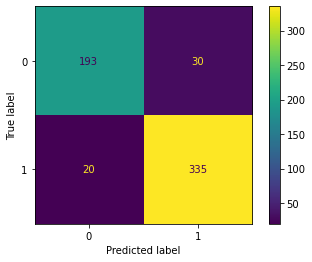

In [241]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Finally, plot the importance of each of the 3 predictor variables, in the same way as we did in class.

Text(0, 0.5, 'Mean decrease in impurity')

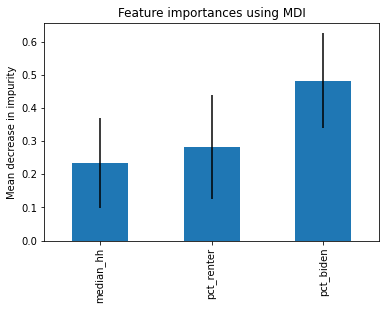

In [242]:
import matplotlib.pyplot as plt
import numpy as np
importances = rf.feature_importances_

forest_importances = pd.Series(importances, index=X_train.columns)

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

Text(0, 0.5, 'Mean decrease in impurity')

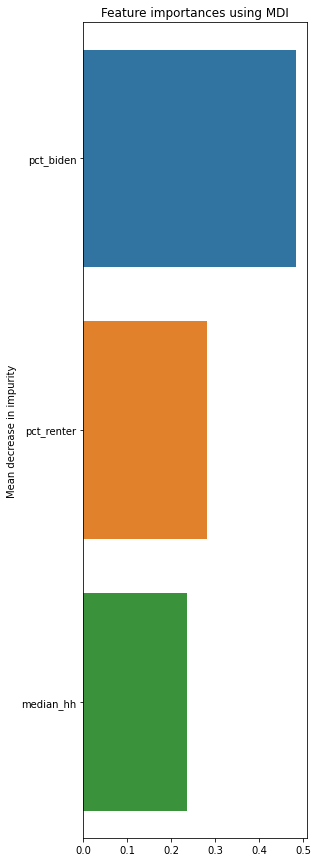

In [243]:
import seaborn as sns

forest_importances.sort_values(inplace=True, ascending=False)

fig, ax = plt.subplots(figsize=(4,15))
sns.barplot(x=forest_importances.values, y=forest_importances.index, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

Comment briefly on your interpretation of the results - your predictive power, which variables are important, and how you might refine the model.

It appears that percent of the tract's population voting for Biden is the greatest predictor of Prop 21 winning in a given tract. I am not necessarily surprised by these results given that Prop 21 involved allowing local governments to enact rent control, which is generally considered a progressive policy. The model is relatively accurate (at least more accurate than the ADU model we worked on in class) with an accuracy score of .91. It would be helpful to add variables--such as demographics and results on other measures involving housing affordability--to this model. This would enable a more nuanced understanding of the factors that contribute to supporting rent control.  

# Challenge Problem
Remember, you need to do at least two of these challenge problems this quarter.

This challenge problem is open ended for you to take in a direction that you are most interested in. Here are some suggestions (do 1 or 2 of these):

* Extend the random forests model to predict vote share on Prop 21, rather than a binary yes/no, and using additional variables. See suggestions below. 
* Use a neural network instead. How much does this improve the predictions? Use charts to compare the predictions to the random forests model.
* Examine the geographic distribution of the predictions, through mapping the prediction errors. Where does your model perform best? Does this give you pointers as to how to improve your model?

In all cases, write some brief interpretation in a markdown cell.

*Predicting a continuous variable*

Classification problems are typically binary or categorical - which category do you predict a given observation to fall into. In some cases, however, we might want to predict a continuous variable, such as the percentage of "yes" votes on Prop 21. For this we can use `RandomForestRegressor`, which works very similarly to `RandomForestClassifier`. You can follow exactly the same steps: create the `rf` object, fit the model, and predict using the test sample.

How do you evaluate model performance? Since we have a continuous variable, we can't use the confusion matrix. But we can look at the absolute error (each predicted value minus the true value for each of our test precincts). I.e., `abs(y_pred-y_test)`. You can also do a scatter plot of the predicted values against the true values. The divergence from the 45 degree line is a good indication of how well the model fits.

## Using continuous variables for Prop 21 and adding additional variables (percent owner occupied and percent yes votes on Prop 17)

In [244]:
joinedDf['pct_owner'] = joinedDf['B25003_002E'] / joinedDf['B25003_001E'] * 100

In [245]:
joinedDf['PR_17_won'] = joinedDf['PR_17_Y'] / (joinedDf['PR_17_Y'] + joinedDf['PR_17_N']) * 100

In [246]:
joinedDf = joinedDf.dropna()

In [247]:
from sklearn.model_selection import train_test_split

xvars = ['median_hh', 'pct_renter', 'pct_owner','pct_biden', 'PR_17_won']
yvar = 'PR_21_won1'

X_train, X_test, y_train, y_test = train_test_split(
    joinedDf[xvars], joinedDf[yvar], test_size = 0.25, random_state = 1)

print(len(X_train), len(y_train) )
print(len(X_test), len(y_test) )

1731 1731
578 578


In [248]:
from sklearn.ensemble import RandomForestRegressor 

rf = RandomForestRegressor(n_estimators = 50, random_state = 1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=1)

In [249]:
y_pred = rf.predict(X_test)
y_pred

array([33.09725111, 58.65284146, 60.11338951, 55.45553202, 42.38384148,
       46.75750576, 46.93110217, 58.01432796, 60.59620767, 51.22819094,
       59.3507398 , 25.06041349, 72.20840301, 47.11665866, 51.4735306 ,
       62.9214278 , 49.09341921, 43.8783881 , 62.82151338, 48.5624855 ,
       54.564062  , 33.71657844, 51.01275007, 30.98816291, 49.39912292,
       61.39835651, 38.09506608, 59.1000413 , 35.63150962, 59.96111916,
       36.22811513, 61.56514622, 51.19177283, 69.6376934 , 44.64958578,
       59.01709942, 50.59810805, 62.26295024, 58.81698496, 34.42516938,
       51.72360322, 29.25550145, 69.25979949, 58.18463782, 70.56342078,
       56.45745963, 54.57576864, 64.79846465, 31.40497541, 36.44717248,
       59.57767266, 33.53164054, 52.52654278, 59.80387892, 67.32818643,
       63.65812548, 45.57370738, 61.29596397, 47.611471  , 33.02166082,
       34.63983069, 42.55751777, 56.1760676 , 36.97817582, 64.03024944,
       57.13155779, 59.90030977, 70.00553013, 36.34371888, 31.16

In [250]:
error = abs(y_pred-y_test)
error.to_frame()

,PR_21_won1
1513,2.722727
1650,1.499406
700,2.810324
111,0.991246
995,2.602940
...,...
2008,1.150796
549,1.433211
632,5.518347
763,5.643602


In [251]:
error.mean()

2.5557674304951625

In [252]:
error.min()

0.008306838225532687

In [253]:
error.max()

13.168970579248082

In [254]:
y_pred = pd.DataFrame(y_pred, columns = ['y_pred'])
y_pred

,y_pred
0,33.097251
1,58.652841
2,60.113390
3,55.455532
4,42.383841
...,...
573,49.652955
574,71.344461
575,74.621966
576,61.575279


In [255]:
y_test = y_test.to_frame()
y_test = y_test.reset_index()

In [256]:
y_pred_y_test = y_pred.join(y_test)
y_pred_y_test

,y_pred,index,PR_21_won1
0,33.097251,1513,35.819978
1,58.652841,1650,57.153435
2,60.113390,700,62.923713
3,55.455532,111,54.464286
4,42.383841,995,44.986781
...,...,...,...
573,49.652955,2008,48.502158
574,71.344461,549,72.777672
575,74.621966,632,80.140313
576,61.575279,763,55.931677


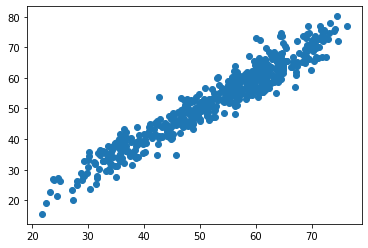

In [257]:
import seaborn as sns

plt.scatter(y_pred_y_test.y_pred, y_pred_y_test.PR_21_won1)

It looks like our model performs pretty well when we add the continuous version of PR_21_won, percent owner-occupied, and percent voting in favor of Prop 17. With the actual values on the y axis and predicted values on the x, we see that points generally fall along the 45 degree line. 

## Mapping Errors

In [258]:
joinedDf_condensed = joinedDf[['geometry']]
joinedDf_condensed.dropna()

,geometry
0,"POLYGON ((-13169350.790 4063591.830, -13169197..."
1,"POLYGON ((-13169467.900 4065613.940, -13169463..."
2,"POLYGON ((-13169034.650 4063225.630, -13168864..."
3,"POLYGON ((-13167528.940 4062726.770, -13167528..."
4,"POLYGON ((-13166671.670 4062511.960, -13166671..."
...,...
2312,"POLYGON ((-13155821.130 4067443.600, -13155812..."
2322,"POLYGON ((-13163713.570 4039600.480, -13163697..."
2325,"POLYGON ((-13170262.060 3997538.880, -13170234..."
2327,"POLYGON ((-13202401.220 4038791.400, -13202399..."


In [259]:
joinedDf_condensed = joinedDf_condensed.join(error)

In [260]:
joinedDf_condensed = joinedDf_condensed.dropna()
joinedDf_condensed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 3 to 2332
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geometry    578 non-null    geometry
 1   PR_21_won1  578 non-null    float64 
dtypes: float64(1), geometry(1)
memory usage: 13.5 KB


In [261]:
import geopandas as gpd
from geopandas import GeoDataFrame
joinedGDf_condensed = GeoDataFrame(joinedDf_condensed, crs="EPSG:4326", geometry='geometry')

In [262]:
type(joinedGDf_condensed)

geopandas.geodataframe.GeoDataFrame

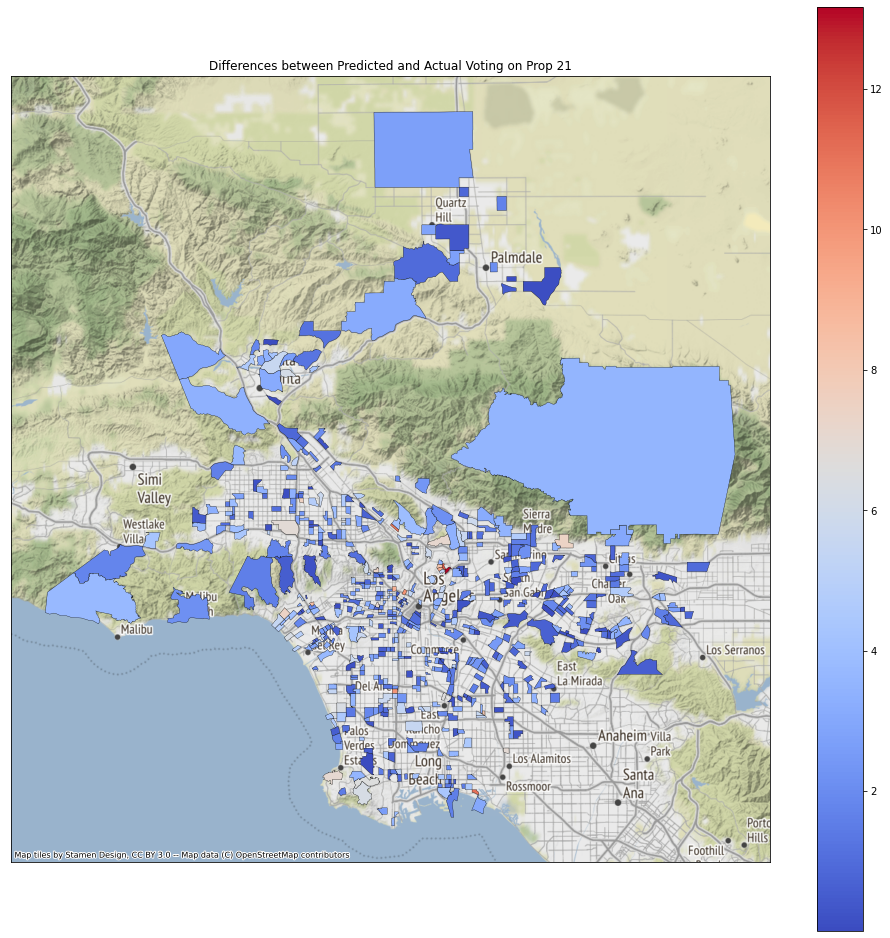

In [263]:
import matplotlib.pyplot as plt
import contextily as ctx

fig, ax = plt.subplots(figsize=(17,17))
joinedGDf_condensed.plot('PR_21_won1', ax = ax, cmap='coolwarm', legend=True, edgecolor='black', linewidth=0.3)

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Differences between Predicted and Actual Voting on Prop 21')

ctx.add_basemap(ax)

It doesn't look like there are any clear discernable patterns from the map. In general, the east side appears to have less error in predictions than the north/central part of the city. There is, however, a small cluster of tracts in that area that has a higher level of error than other parts. Perhaps this area has less cohesive voting patterns or high levels of income inequality (which may create less cohesive voting patterns). It might be helpful to incorporate additional proposition voting variables to see if the predictions of these tracts improve. 